<a href="https://colab.research.google.com/github/kanav9063/Deep-Learning/blob/main/190I_HW2%2CMulti_class_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This homework is divided into two sections:

1. **Kernel Trick for Two-Class Classification**:
In this section, you will explore the *kernel trick* technique to address scenarios where standard logistic regression fails to correctly classify data into two distinct classes.

2. **Multi-Class Logistic Regression on the MNIST Dataset**:
In the second section, you will implement multi-class logistic regression to classify handwritten digits from the MNIST dataset. Additionally, you will enhance the model's performance by leveraging a pre-trained model to extract features.

In [1]:
import math
import torch
import random
import numpy as np
from tqdm import tqdm
from functools import partial
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
%matplotlib inline


def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

reset_seed(42)

# Task 1. Kernel Trick for Two-Class Classificatio

We will use the `scikit-learn` library to generate synthetic non-linear data. The generated dataset consists of two moon-shaped clusters, making it a classic example of a non-linear classification problem.


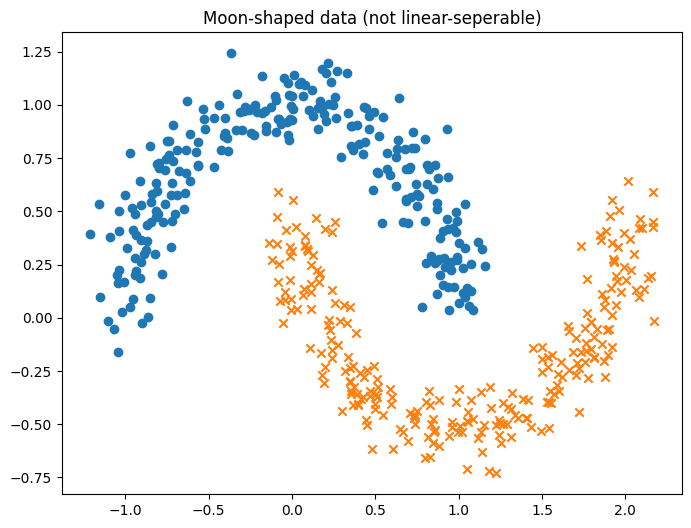

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

def plot_2d_data(X, y, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='x')
    plt.title(title)
    plt.show()

def generate_nonlinear_data(n_samples=500, noise=0.1, random_state=42):
    X_moon, Y_moon = make_moons(
        n_samples=n_samples, noise=noise, random_state=random_state
    )

    plot_2d_data(X_moon, Y_moon, 'Moon-shaped data (not linear-seperable)')
    return X_moon, Y_moon

X_moon, Y_moon = generate_nonlinear_data(
    500, 0.1, 42
)
Y_moon = Y_moon.reshape(-1, 1)
Y_moon[Y_moon== 0] = -1

**Task 1.1: Logistic Regression with Gradient Descent Training**
In this task, your will implement logistic regression using gradient descent for model training. Below are the key functions you need to develop:

1. `weight_initialization`:
This function initializes the model's parameters using the `np.random.randn` function to generate random values.

2. `calc_grad`:
This function computes the gradient of the loss function with respect to the model parameters, given the input features and target labels.

3. `predict`:
This function applies the trained logistic regression model to a dataset and returns the predicted outputs.

4. `train_gradient_descent`:
This function implements the gradient descent algorithm for training. It should also visualize the training loss and accuracy over the course of the training process.

5. `visualize_loss_acc`:
This function uses Matplotlib to display plots of training loss and accuracy, helping you track the model's performance.

**Note:**
This task is very similar to Task 1.4 from HW1. You can reuse and modify your previous code from HW1 to complete this task.

The final train accuracy should be more than 80%

In [3]:
def weight_initialization(shape):
  '''
  This function initializes the model's weight.

  Input:
  shape: the shape of the parameter

  Return:
  w: the paramt er of the logistic regression model.
  '''
  w = np.array(0)
  ############################################
  ## TODO: initialize the weight using      ##
  ## np.random.randn                        ##
  ############################################
  w=np.random.randn(*shape)
  print(w.shape)
  ###########################################
  ############ End of your code #############
  ###########################################
  return w

def calc_grad(w, features, targets):
  '''
  This function initializes the model's weight.
  Return:
  w: the paramter of the logistic regression model.
  '''
  grad = np.array(0)
  ############################################
  ## TODO: calculate the gradient of w      ##
  ## for the samples (features, targets).   ##
  ############################################

  N = features.shape[0]

  #x.w^T
  z = np.dot(features, w)

  #sigmoid
  sigmoid = 1 / (1 + np.exp(-z))

  #gradient=  (1/N) * X^T . (sigmoid - targets)
  grad = (1 / N) * np.dot(features.T, (sigmoid - targets))


  ###########################################
  ############ End of your code #############
  ###########################################
  return grad

def predict(w, features):
  '''
  This function returns the logistic regression model's prediction.
  Return:
  pred: a numpy array of the model predictio (1/ -1) label
  '''
  ############################################
  ## TODO: apply trained model on input data##
  ############################################
  z = np.dot(features, w)

  sigmoid = 1 / (1 + np.exp(-z))

  pred = np.where(sigmoid > 0.5, 1, -1)

  return pred
  ###########################################
  ############ End of your code #############
  ###########################################


def visualize_loss_acc(losses, accs):
  '''
  This function plots the loss curve and accuracy curve using matplotlib.
  '''
  # use matplotlib plot train curves
  plt.figure(figsize=(8, 12))

  ############################################
  ## TODO: Plot the train curves            ##
  ############################################

  #loss curve
  plt.subplot(2, 1, 1)
  plt.plot(losses, label='Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss Curve')
  plt.legend()

  #accuracy curve
  plt.subplot(2, 1, 2)
  plt.plot(accs, label='Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curve')
  plt.legend()

  ###########################################
  ############ End of your code #############
  ###########################################

  # Show the figure.
  plt.show()

def train_gradient_descent(num_epochs, lr, w, train_features, train_targets):
  '''
  This function trains the model w using gradient desent on the dataset (train_features, train_targets).

  Returns:
  w_star: the optimized model parameter w.
  '''
  losses = []
  accs = []

  # Train loop
  for i in range(num_epochs):

    grad = np.zeros_like(w)

    ############################################
    ## TODO: calculate the gradient for w.    ##
    ## And the update w                       ##
    ############################################

    grad = calc_grad(w, train_features, train_targets)
    w -= lr * grad

    ###########################################
    ############ End of your code #############
    ###########################################

    # record the value of the objective function and acc on training
    loss = 0
    acc = 0
    ############################################
    ## TODO: calculate the objective function ##
    ## and acc                                ##
    ############################################

    # Binary cross-entropy loss calculation
    z = np.dot(train_features, w)
    sigmoid = 1 / (1 + np.exp(-z))

    loss = (-1 / train_features.shape[0]) * np.sum(train_targets * np.log(sigmoid) + (1 - train_targets) * np.log(1 - sigmoid))

    # Accuracy calculation
    preds = predict(w, train_features)
    acc = np.mean(preds == train_targets)

    ###########################################
    ############ End of your code #############
    ###########################################

    # store values for plotting
    if i % 20:
        losses.append(loss)
        accs.append(acc)
  w_star = w

  print("Training done")
  print(f"Maximum training accuracy: {max(accs)}")
  visualize_loss_acc(losses, accs)
  return w_star

(2, 1)
Training done
Maximum training accuracy: 0.878


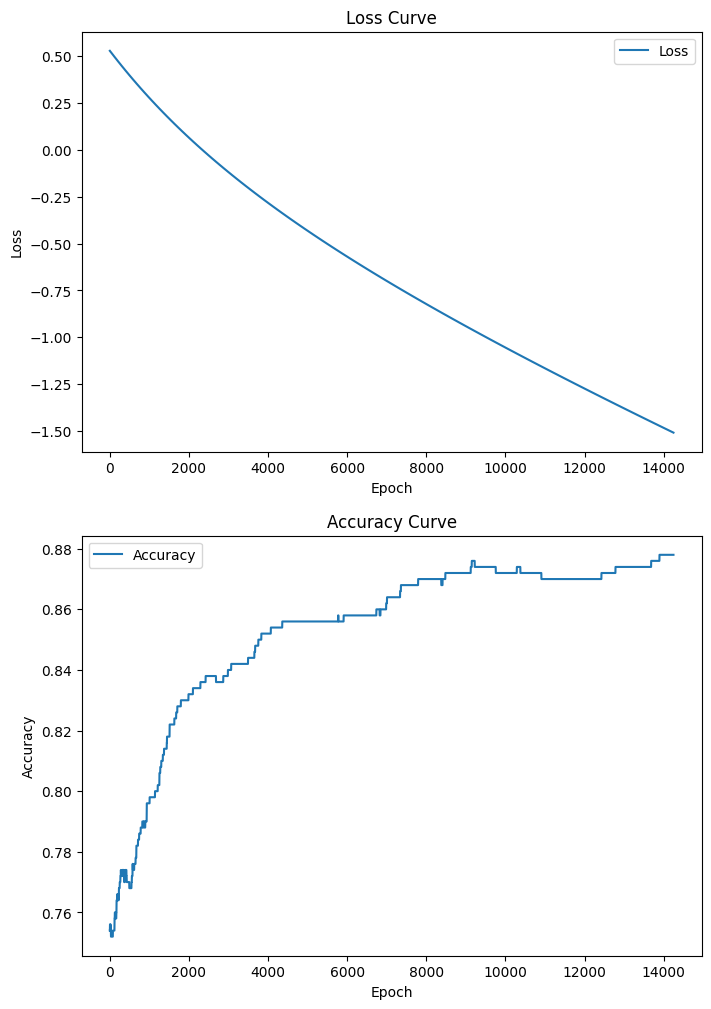

In [19]:
# Train loop

reset_seed(42) # NOTICE: DO NOT CHANGE THIS SEED
# GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 15000
lr = 1e-3

# weight initialization
param_shape = tuple([1, 1])
###########################################
## TODO: the shape for model weight      ##
## Train_features has the shape (500, 2) ##
###########################################
param_shape = (2, 1)
###########################################
############ End of your code #############
###########################################

w = weight_initialization(param_shape)
w_star = train_gradient_descent(num_epochs, lr, w, X_moon, Y_moon)

**Task 1.2: Visualizing the Decision Boundary**

In this task, your goal is to plot the decision boundary of a trained logistic regression model. Visualizing the decision boundary provides insights into how well the model separates different classes, helping us better understand its behavior and performance.

To simplify your work, we have provided a helper function to assist you with the visualization.

In [7]:
# Function to plot the decision boundary of a logistic regression model
def plot_decision_boundary(X, y, W_star, kernel_func=lambda x: x, **kwargs):

    # Generate grids points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Flatten the grid and transform with the kernel function
    grid = np.c_[xx.ravel(), yy.ravel()]
    K_grid = kernel_func(grid, **kwargs)

    # Predict on the grid
    Z = predict(W_star, K_grid)
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap='coolwarm')
    plt.show()

Run the provided code, and you should observe a white line dividing the 2D plane into two regions. Most of the blue points will be located in the blue-shaded region. However, this visualization reveals that the current logistic regression model is not well-suited for classifying this moon-shaped data.

In the next section, you will enhance the model by applying a polynomial kernel function to transform the raw input features into a higher-dimensional space. This transformation will help the model capture non-linear relationships and improve classification accuracy.

For a more detailed explanation of kernel functions, refer to this [wikipedia](https://www.wikiwand.com/en/articles/Kernel_method).

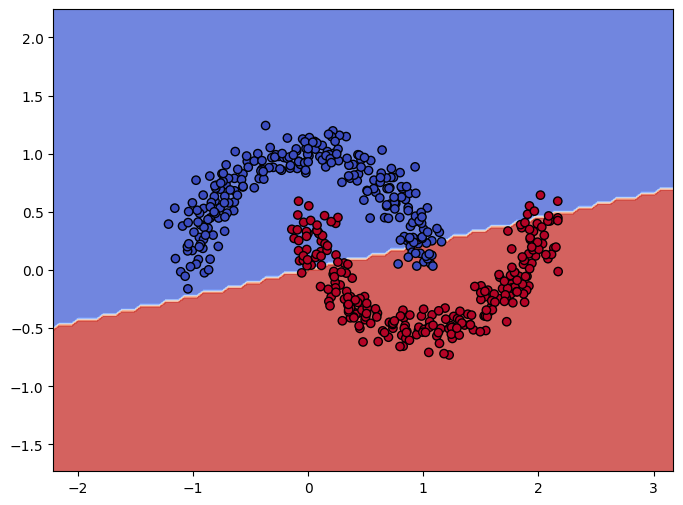

In [20]:
plot_decision_boundary(
    X_moon, Y_moon, w_star
)

# Task 1.3: Solve moon-shaped classification with polynomial kernel function

In this task, we aim to address the challenges of classifying the moon-shaped dataset. We have provided the polynomial kernel function, which transforms the non-linearly separable data into a higher-dimensional space, making it linearly separable.

With these transformed features, you can now train a simple logistic regression model that achieves high accuracy on the dataset. This approach leverages the power of kernel functions to enhance model performance on complex data structures.

The final train accuracy should be more than 90%

In [21]:
def polynomial_kernel(X1, X2, degree=3, coef0=1, scale=0.1):
    return scale * (X1 @ X2.T + coef0) ** degree

def normalize_data(X, mean, std):
    return (X - mean) / std

def transform_dataset(X1, X2, kernel_func, **kwargs):
    return kernel_func(X1, X2, **kwargs)

(500, 1)


<ipython-input-3-4d1ef214be99>:146: RuntimeWarning: divide by zero encountered in log
  loss = (-1 / train_features.shape[0]) * np.sum(train_targets * np.log(sigmoid) + (1 - train_targets) * np.log(1 - sigmoid))
<ipython-input-3-4d1ef214be99>:146: RuntimeWarning: invalid value encountered in multiply
  loss = (-1 / train_features.shape[0]) * np.sum(train_targets * np.log(sigmoid) + (1 - train_targets) * np.log(1 - sigmoid))
<ipython-input-3-4d1ef214be99>:144: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))
<ipython-input-3-4d1ef214be99>:63: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))
<ipython-input-3-4d1ef214be99>:41: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


Training done
Maximum training accuracy: 0.85


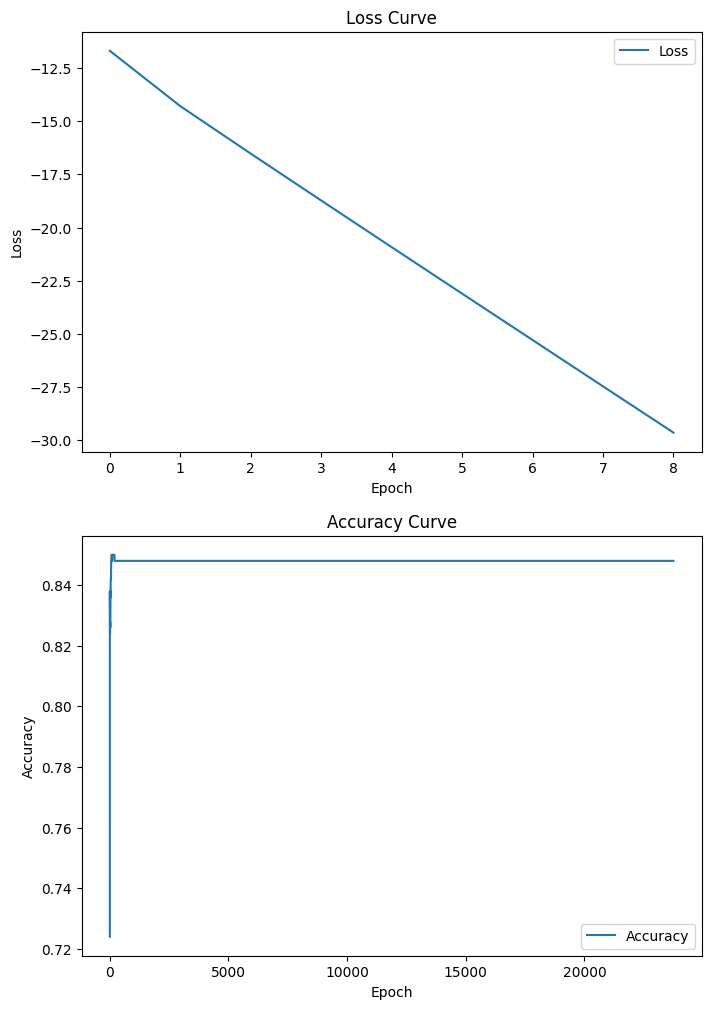

In [38]:
# Train loop

reset_seed(42) # NOTICE: DO NOT CHANGE THIS SEED
# GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 25000
lr = 1e-2

raw_mean, raw_std = np.mean(X_moon, axis=0), np.std(X_moon, axis=0)
normalize_X_moon = normalize_data(X_moon, raw_mean, raw_std)
new_X_moon = transform_dataset(normalize_X_moon, normalize_X_moon, polynomial_kernel, degree=3)
new_Y_moon = Y_moon

#########################################################################
## TODO: use previous functions to train a model on transformed data   ##
##       (new_X_moon, new_Y_moon)                                  ##
#########################################################################

w = weight_initialization(param_shape)

w_star = train_gradient_descent(num_epochs, lr, w, new_X_moon, new_Y_moon)

#########################################################################
############               End of your code                 #############
#########################################################################

Run the following code to observe how the new decision boundary aligns well with the moon-shaped data. The improved alignment is due to the polynomial kernel function, which transforms the original dataset into a linearly separable space. This transformation allows the logistic regression model to perform significantly better on the complex data structure.

<ipython-input-3-4d1ef214be99>:63: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


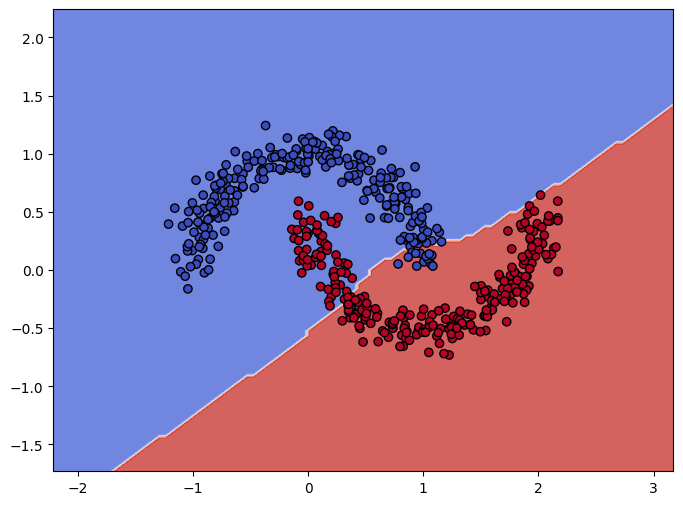

In [28]:
kernel_func = lambda X: transform_dataset(
    normalize_data(X, raw_mean, raw_std), normalize_X_moon, polynomial_kernel, degree=3,
)
plot_decision_boundary(
    X_moon, Y_moon, w_star, kernel_func=kernel_func
)

# Task 2. Multi-Class Logistic Regression on the MNIST Dataset

In this task, you will experiment multi-class classification on MNIST dataset, which contains images for 10 digits.

You will first implement a basic 10-class logistic regression model based on raw pixel features for MNIST, and then apply logistic regression on features extracted using a pre-trained CNN model, which will be covered in future class.


In this task, you will explore multi-class classification using the MNIST dataset, which consists of images representing the digits 0 to 9.

**1. Basic Logistic Regression Model**

Implement a 10-class logistic regression model using the raw pixel values from the MNIST images as features.

**2. Logistic Regression with features from pre-trained vision model**

You will apply logistic regression on features extracted from a pre-trained Convolutional Neural Network (CNN) model to further enhance model performance. CNN will be covered in future class.

In [ ]:
def download_mnist():
    train_dataset_ = datasets.MNIST('./data', train=True, download=True)
    test_dataset_ = datasets.MNIST('./data', train=False, download=True)
    return train_dataset_, test_dataset_

train_dataset_, test_dataset_ = download_mnist()
print(f"First data point in the training set: {train_dataset_[0]}")
# Convert image to numpy array
img = np.array(train_dataset_[0][0]).astype(np.float32)
print(f"Image shape: {img.shape}")
print(f"Pixel value range: {img.min()} - {img.max()}")

In [ ]:
def plot(imgs, row_title=None):
    # This helper function is modified based on https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html
    if not isinstance(imgs[0], list):
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap='gray')
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

plot([train_dataset_[i][0] for i in range(5)])

In [ ]:
def normalize_image(image, mean=0.5, std=0.5):
    """
    This function normalizes the input Grayscale image into a numpy array.

    Return:
    normalized_image: array of shape (1, height, width), the pixel value is first
    converted to [0, 1] and then normalized with specified mean and std.
    """
    normalized_image = np.array(image).astype(np.float32)
    normalized_image = normalized_image / 255.
    normalized_image = (normalized_image - mean) / std
    normalized_image = normalized_image[None,:,:]
    return normalized_image


def transform_mnist(dataset):
    """
    This function transforms all images and stacks them in an array.

    Return:
    features: array of shape (N, 1, height, width)
    targets: array of shape (N, 1)
    where N is the number of data points in the dataset
    """
    features = []
    targets = []

    for sample in dataset:
        image, label = sample
        features.append(normalize_image(sample[0]))
        targets.append(label)

    features = np.stack(features)
    targets = np.stack(targets)[:,None]
    return features, targets

def random_shuffle(features, targets):
  shuffled_features = None
  shuffled_targets = None
  idx = np.random.permutation(features.shape[0])
  shuffled_features = features[idx]
  shuffled_targets = targets[idx]
  return (shuffled_features, shuffled_targets)

def raw_pixel_feature(features):
    return np.reshape(features, (features.shape[0], -1))

In [ ]:
train_data = transform_mnist(train_dataset_)
test_data = transform_mnist(test_dataset_)
print(train_data[0].shape) # the shape should be (60000, 1, 28, 28)
print(train_data[1].shape) # the shape should be (60000, 1)

reset_seed(42) #! DO NOT CHANGE THIS SEED
train_features, train_targets = random_shuffle(train_data[0], train_data[1])
test_features, test_targets = test_data[0], test_data[1]

## Task 2.1: Multi-class logistic regression with stochastic gradient descent training

We have provided a skeleton of the training loop for this task. Your job is to implement the following essential functions:

1. `onehot()`:
Converts a class label into a one-hot encoded vector.

2. `softmax()`:
Converts the model’s output logits into a probability distribution over the classes.

3. `CrossEntropyLoss()`:
Implements the cross-entropy loss function to measure the difference between predicted and true distributions.

4. `Grad_crossentropy()`:
Computes the gradient of the cross-entropy loss with respect to the model’s predictions.

5. `forward()`:
Takes input features and outputs the predicted class distribution.

6. `predict()`:
Predicts the class label given the input features by selecting the class with the highest probability.

We have also implemented unit tests to help you verify the correctness of some of these functions. Please note all functions with their names containting `unittest`.

In [ ]:
from tqdm import tqdm

def train_loop_sgd(
    num_epochs, batch_size, lr, W, X_train, y_train,
    forward_fn, predict_fn, loss_fn, grad_fn, acc_fn,
):
    '''
    This function is a skeleton train loop.

    Returns:
    w_star: the optimized model parameter w.
    '''
    losses, accs = [], []
    for epoch in tqdm(range(num_epochs)):
        idx = np.random.permutation(X_train.shape[0])
        epoch_step = math.ceil(X_train.shape[0] / batch_size)

        for j in range(epoch_step):
            grad = np.zeros_like(W)

            batch_idx = idx[j * batch_size : (j+1) * batch_size]
            batch_X = X_train[batch_idx]
            batch_y = y_train[batch_idx]

            # Forward pass
            y_pred = forward_fn(batch_X, W)

            # Calculate loss
            loss = loss_fn(batch_y, y_pred)

            # Calculate gradients
            grad_W = grad_fn(batch_X, batch_y, y_pred)

            # Update parameters using gradient descent
            W -= lr * grad_W

        y_pred = forward_fn(X_train, W)
        loss = loss_fn(y_train, y_pred)
        # Check the prediction accuracy
        y_pred = predict_fn(X_train, W)
        acc = acc_fn(y_train, y_pred)

        # We report loss/accuracy per epoch
        losses.append(loss)
        accs.append(acc)

    W_star = W
    print("Training done")
    print(f"Best training accuracy: {max(accs)}")
    visualize_loss_acc(losses, accs)
    return W_star

def one_hot(y, num_class=10):
    # y: (N, 1) contains the class index
    ############################################
    ## TODO: softmax function                 ##
    ############################################
    pass
    ############################################
    ## End of Your Code                       ##
    ############################################

def softmax(z):
    ############################################
    ## TODO: softmax function                 ##
    ############################################
    pass
    ############################################
    ## End of Your Code                       ##
    ############################################

def CrossEntropyLoss(y_truth, y_pred):
    ############################################
    ## TODO: cross entropy loss               ##
    ############################################
    pass
    ############################################
    ## End of Your Code                       ##
    ############################################

def calc_grad(X, y_truth, y_pred):
    ############################################
    ## TODO: grad of cross entropy loss       ##
    ############################################
    pass
    ############################################
    ## End of Your Code                       ##
    ############################################

def forward(X, W):
    #########################################################
    ## TODO: return the predicted class distribution       ##
    #########################################################
    pass
    #########################################################
    ## End of Your Code                                    ##
    #########################################################

def predict(X, W):
    #########################################################
    ## TODO: return the predicted class distribution       ##
    #########################################################
    pass
    #########################################################
    ## End of Your Code                                    ##
    #########################################################

def class_acc(y_truth, y_pred):
    #########################################################
    ## TODO: return the prediction accuracy                ##
    #########################################################
    pass
    #########################################################
    ## End of Your Code                                    ##
    #########################################################


In [ ]:
from numpy.testing import assert_allclose

def unittest_onehot():
    inp = np.array([1, 3, 9])
    expected = np.array(
      [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]
    )
    assert_allclose(
        expected, one_hot(inp), rtol=1e-5
    )

def unittest_softmax():
    inp = np.array([[1. * i, 2. * i, 3. * i] for i in range(3)])
    expected = np.array([
       [0.33333333, 0.33333333, 0.33333333],
       [0.09003057, 0.24472847, 0.66524096],
       [0.01587624, 0.11731043, 0.86681333],
    ])
    assert_allclose(
        expected, softmax(inp), rtol=1e-5
    )

def unittest_crossentropyloss():
    inp_y_pred = softmax(np.array([[j * i for j in range(10)] for i in range(3)]))
    inp_y_truth = np.array([1, 0, 1])
    expected = 9.302209431076154
    assert (CrossEntropyLoss(inp_y_truth, inp_y_pred) - expected)**2 < 1e-5

def unittest_calc_grad():
    inp_X = np.array([[0.05 * i + j * 0.1 for j in range(2)] for i in range(3)])
    inp_y_pred = softmax(np.array([[j * i for j in range(10)] for i in range(3)]))
    inp_y_truth = np.array([1, 0, 1])

    expected = np.array(
        [[-1.66653660e-02, -3.33297957e-02,  9.63139159e-06,
         2.62927786e-05,  7.22983272e-05,  2.02639049e-04,
         5.95990624e-04,  1.95376454e-03,  7.77656675e-03,
         3.93579783e-02],
       [-4.66627651e-02, -9.66560571e-02,  3.36220354e-03,
         3.41203458e-03,  3.54891979e-03,  3.93158172e-03,
         5.04986222e-03,  8.66673073e-03,  2.27623788e-02,
         9.25851108e-02]]
    )
    assert_allclose(expected, calc_grad(inp_X, inp_y_truth, inp_y_pred), rtol=1e-5)

**Task 2.2 Multi-class logistic regression on pixel feature**

Train the model and report the test accuracy.

The final train accuracy should be around 85%

In [ ]:
pixel_train_features = raw_pixel_feature(train_features)

# HYPER PARAMETERS
num_epochs = 30
batch_size = 64
lr = 1e-2
num_class = 10

W = weight_initialization(tuple([pixel_train_features.shape[-1], num_class]))
W_star = train_loop_sgd(
   num_epochs, batch_size, lr, W,
   pixel_train_features, train_targets.squeeze(),
   forward, predict, CrossEntropyLoss, calc_grad, class_acc
)


In [ ]:
#########################################################
## TODO: Report the accuracy on test dataset           ##
## 1. apply `raw_pixel_feature` function               ##
## 2. predict using the learned parameter `W_star`     ##
## 3. calculate test accuracy                          ##
#########################################################

#########################################################
## End of Your Code                                    ##
#########################################################

**Task 2.3: Multi-class logistic regression on features extracted using pre-trained CNN model**

As demonstrated earlier with the polynomial kernel function, we can further improve model performance by using various feature extraction methods. In this section, we will experiment with a pre-trained MobileNet-V2 model, a convolutional neural network (CNN) that we will explore in more detail in future class.

**It may need about 5 minutes to finish the feature extraction**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load Pretrained MobileNetV2 Model (Feature Extractor)
mobilenet = models.mobilenet_v2(pretrained=True).to(device)
mobilenet.classifier = nn.Identity()
mobilenet.eval()

# 2. Define Data Transformations (Resize and Normalize for MobileNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for MobileNet
])

# 3. Load MNIST Dataset with DataLoader
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# 4. Extract Features with MobileNetV2
def extract_features(model, data_loader):
    """Extract features batch-wise using the given model."""
    all_features = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(data_loader):
            images = images.to(device)
            features = model(images)
            features = features.cpu().numpy()
            all_features.append(features)
            all_labels.append(labels.numpy())

    return np.concatenate(all_features, axis=0), np.concatenate(all_labels, axis=0)

# 5. Extract Features for Train and Test Sets
print("Extracting train features...")
x_train_features_cnn, y_train = extract_features(mobilenet, train_loader)

print("Extracting test features...")
x_test_features_cnn, y_test = extract_features(mobilenet, test_loader)

print(f'Train features shape: {x_train_features_cnn.shape}')
print(f'Test features shape: {x_test_features_cnn.shape}')

**Task 2.2 Multi-class logistic regression on pixel feature**

Train the model and report the test accuracy.

The final train accuracy should be around 90%.

In [ ]:
num_epochs = 30
batch_size = 64
lr = 1e-2


#########################################################
## TODO: Train multi-class logistic regression         ##
## 1. initialize model weights                         ##
## 2. train on x_train_features_cnn, y_train           ##
#########################################################

# 1. W = [YOUR CODE]
# 2. W_star = train_loop_sgd( [YOUR CODE] )

#########################################################
## End of Your Code                                    ##
#########################################################

In [ ]:
#########################################################
## TODO: Report the accuracy on test dataset           ##
## 1. predict using the learned parameter `W_star`     ##
## 2. test data: x_test_features_cnn, y_test           ##
## 3. calculate test accuracy                          ##
#########################################################


#########################################################
## End of Your Code                                    ##
#########################################################